In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import glob
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Build Dataset

In [2]:
# build data
text_df = pd.DataFrame()
labels = pd.DataFrame()
fp_base = './Data_Categorical/'
violence_types = ['Physical violence', 'Bullying', 'Weapons use', 'Dating violence']
data = []
for vtype in violence_types:
    fp_complete = fp_base + vtype + '/*.txt'
    files_list = glob.glob(fp_complete)
    for fname in files_list:
        with open(fname, errors='ignore') as f:
            txt = f.read()
        data.append((txt, vtype))

In [3]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    """lemmatize and clean doc"""
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return ''.join([x for x in normalized if not x.isnumeric()])

In [4]:
text = []
label = []
# *NOTE: Better to use zip(*data)
for (t, l) in data:
    text.append(clean(t))
    label.append(l)

# Try TF->SVD->SVM

In [219]:
vocabs = ['dating', 'bullying', 'violence', 'sexual', 'weapons']
x_train, x_test, y_train, y_test = train_test_split(text, label, test_size=0.2)
tf_vect = TfidfVectorizer(use_idf=False, binary=True, max_features=100, ngram_range=(2,2))
x_train_tf = tf_vect.fit_transform(x_train)
x_test_tf = tf_vect.transform(x_test)
svd = TruncatedSVD(n_components=3)
x_train_tf_svd = svd.fit_transform(x_train_tf)
x_test_tf_svd = svd.transform(x_test_tf)
clf = LinearSVC()
clf.fit(x_train_tf, y_train)
print("******Test Result******")
print("Test Set Size:", len(x_test))
print("Score:", sum(clf.predict(x_test_tf) == y_test) / len(x_test))

******Test Result******
Test Set Size: 72
Score: 0.05555555555555555


# Attempt to use matrix distance

In [86]:
from sklearn.linear_model import LogisticRegression
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

In [79]:
len(dating_violence_texts)

37

In [129]:
dating_violence_texts = [x[0] for x in data if x[1] == 'Dating violence']
dating_vectorizer = TfidfVectorizer(binary=True, max_features=100)
model_vector = dating_vectorizer.fit_transform(dating_violence_texts[:20])
test_vector = dating_vectorizer.transform(dating_violence_texts[21:])

In [130]:
vector_average = np.mean(model_vector, axis=0)

In [131]:
np.mean(distance.cdist(vector_average, test_vector[6].toarray(), 'euclidean'))

0.1032677449693021

In [132]:
weapon_text = [x[0] for x in data if x[1] == 'Weapons use']
test_weapon_vector = dating_vectorizer.transform(weapon_text)

In [133]:
weapon_means = []
for tv in test_weapon_vector:
    weapon_means.append(np.mean(distance.cdist(vector_average, tv.toarray(), 'euclidean')))
weapon_means = np.array(weapon_means)

0.5172413793103449


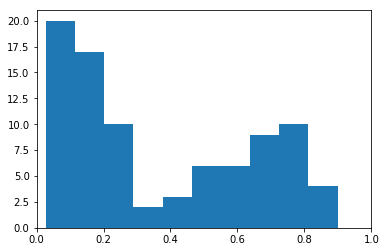

In [134]:
plt.hist(weapon_means)
plt.xlim(0,1)
print(len(weapon_means[weapon_means <= 0.25]) / len(weapon_means))

In [135]:
dating_means = []
for tv in test_vector: # dating
    dating_means.append(np.mean(distance.cdist(vector_average, tv.toarray(), 'euclidean')))
dating_means = np.array(dating_means)

0.9375


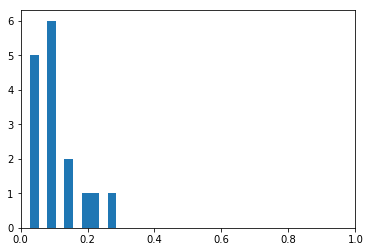

In [136]:
plt.hist(dating_means)
plt.xlim(0,1)
print(len(dating_means[dating_means <= 0.25])/ len(dating_means))

In [137]:
phys_text = [x[0] for x in data if x[1] == 'Physical violence']
test_phys_vector = dating_vectorizer.transform(phys_text)

In [138]:
phys_means = []
for tv in test_phys_vector:
    phys_means.append(np.mean(distance.cdist(vector_average, tv.toarray(), 'euclidean')))
phys_means = np.array(phys_means)

0.6554621848739496


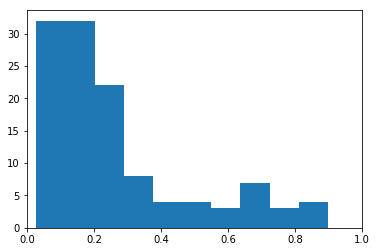

In [139]:
plt.hist(phys_means)
plt.xlim(0,1)
print(len(phys_means[phys_means <= 0.25])/ len(phys_means))

In [7]:
phys_text = [x[0] for x in data if x[1] == 'Physical violence']
dating_text = [x[0] for x in data if x[1] == 'Dating violence']
bully_text = [x[0] for x in data if x[1] == 'Bullying']
weapon_text = [x[0] for x in data if x[1] == 'Weapons use']

In [13]:
from vector_distance_classifier import VDC
dating_clf = VDC()
dating_clf.fit(dating_text)
phys_clf = VDC()
phys_clf.fit(phys_text)
weapons_clf = VDC()
weapons_clf.fit(weapon_text)
bully_clf = VDC()
bully_clf.fit(bully_text)